### NYC Complaint Data Analysis

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in NY are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 compliants that are related to housing and buildins.
In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.
Therefore, a solution is presented here to help the Department of Housing Preservation and Development to manage their large volume of 311 complaints they are receiving every year.

The agency needs severals questions, which are answered below:

### 2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

To address this problem, we first need to do some preparations and explatory data analysis.

##### Preparations

We are going to use the data we downloaded at the first problem, that we already selected necessary columns to address HPD complaint type. Now, let's import all necassery packages, libraries and load the files needed for our EDA:

In [1]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# scientific computing and technical computing
import scipy
# statistical data visualization
import seaborn as sns
# Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read csv data
HPD_df = pd.read_csv('HPD_df.csv')
# Print number of rows and columns (dataframe shape)
HPD_df.shape

(6041299, 17)

Let's check if there is a duplicate in the dataset and check the shape of the dataset again.

In [3]:
HPD_df.duplicated(subset=None, keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
6041294    False
6041295    False
6041296    False
6041297    False
6041298    False
Length: 6041299, dtype: bool

In [4]:
# Print number of rows and columns (dataframe shape)
HPD_df.shape

(6041299, 17)

There is no duplicate in the dataset. So, we can do our analysis. However, it is better to check for missing values.

In [5]:
HPD_df.isnull().sum()

Unnamed: 0                     0
unique_key                     0
created_date                   0
closed_date               125878
complaint_type                 0
location_type              52830
incident_zip               80708
incident_address           52831
street_name                52831
address_type               84771
city                       80284
status                         0
resolution_description      7823
borough                        0
latitude                   80682
longitude                  80682
location                   80682
dtype: int64

We know how many complaints are made to each department. HEAT/HOT WATER is severe complaint type that we idendified in the Question 1. Now, let's do some analysis to address our second question, which is where these complaints are coming mostly.

It would be better to select the rows that we will work on for this problem. Let's do it as following:

In [6]:
severe_complaint = HPD_df.loc[HPD_df['complaint_type'] =='HEAT/HOT WATER']
severe_complaint

,Unnamed: 0,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude,location
2674215,2674215,27611774,2014-03-11T00:00:00.000,2014-03-13T00:00:00.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,11216.0,551 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.678626,-73.949663,"{'latitude': '40.67862555319979', 'longitude':..."
2674216,2674216,27611775,2014-03-11T00:00:00.000,2014-03-14T00:00:00.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,11432.0,87-77 169 STREET,169 STREET,ADDRESS,Jamaica,Closed,The Department of Housing Preservation and Dev...,QUEENS,40.710473,-73.792888,"{'latitude': '40.71047346063291', 'longitude':..."
2674217,2674217,27611776,2014-03-11T00:00:00.000,2014-03-13T00:00:00.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10031.0,524 WEST 145 STREET,WEST 145 STREET,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.825595,-73.948489,"{'latitude': '40.82559523370864', 'longitude':..."
2674219,2674219,27611779,2014-03-11T00:00:00.000,2014-03-11T00:00:00.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10040.0,34 ARDEN STREET,ARDEN STREET,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.861937,-73.927146,"{'latitude': '40.86193738190631', 'longitude':..."
2674220,2674220,27611780,2014-03-11T00:00:00.000,2014-03-14T00:00:00.000,HEAT/HOT WATER,RESIDENTIAL BUILDING,10036.0,408 WEST 44 STREET,WEST 44 STREET,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.759972,-73.992279,"{'latitude': '40.759971753107415', 'longitude'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041294,6041294,45682909,2020-02-23T11:10:57.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11105.0,21-09 19 STREET,19 STREET,ADDRESS,Astoria,Open,The following complaint conditions are still o...,QUEENS,40.782909,-73.915941,"{'latitude': '40.78290933099697', 'longitude':..."
6041295,6041295,45682910,2020-02-23T12:40:40.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10455.0,540 CONCORD AVENUE,CONCORD AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.812821,-73.908226,"{'latitude': '40.81282099564636', 'longitude':..."
6041296,6041296,45682911,2020-02-23T17:25:51.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10026.0,140 WEST 113 STREET,WEST 113 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.800856,-73.952933,"{'latitude': '40.80085621357295', 'longitude':..."
6041297,6041297,45682912,2020-02-23T21:20:08.000,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11373.0,89-21 ELMHURST AVENUE,ELMHURST AVENUE,ADDRESS,Elmhurst,Open,The complaint you filed is a duplicate of a co...,QUEENS,40.747420,-73.876853,"{'latitude': '40.747420328856705', 'longitude'..."


In [7]:
borough_complaint = severe_complaint.groupby('borough')[['unique_key']].count()
borough_complaint.columns = ['No. of Complaints']
borough_complaint = pd.DataFrame(borough_complaint)
print(borough_complaint.index.unique(), 'Max Complaints = ',  borough_complaint.values.max())


#zip_complaint = severe_complaint.groupby('incident_zip')[['unique_key']].count()
zip_complaint = severe_complaint.groupby('incident_zip')['complaint_type'].count()
zip_complaint15 = zip_complaint.nlargest(15)
zip_complaint.columns = ['No. of Complaints']
zip_complaint = pd.DataFrame(zip_complaint)
print(zip_complaint.index.unique(), 'Max Complaints = ',  zip_complaint.values.max())

#street_complaint = severe_complaint.groupby('street_name')[['unique_key']].count()
street_name_complaint = severe_complaint.groupby('street_name')['complaint_type'].value_counts()
street_name_complaint15 = street_name_complaint.nlargest(15)
street_name_complaint.columns = ['No. of Complaints']
street_name_complaint = pd.DataFrame(street_name_complaint)
print(street_name_complaint.index.unique(), 'Max Complaints = ',  street_name_complaint.values.max())


Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'Unspecified'],
      dtype='object', name='borough') Max Complaints =  416326
Float64Index([10001.0, 10002.0, 10003.0, 10004.0, 10005.0, 10006.0, 10007.0,
              10009.0, 10010.0, 10011.0,
              ...
              11433.0, 11434.0, 11435.0, 11436.0, 11691.0, 11692.0, 11693.0,
              11694.0, 11697.0, 12345.0],
             dtype='float64', name='incident_zip', length=191) Max Complaints =  42273
MultiIndex([(      '1 AVENUE', 'HEAT/HOT WATER'),
            (       '1 PLACE', 'HEAT/HOT WATER'),
            (      '1 STREET', 'HEAT/HOT WATER'),
            (     '10 AVENUE', 'HEAT/HOT WATER'),
            (     '10 STREET', 'HEAT/HOT WATER'),
            (    '100 AVENUE', 'HEAT/HOT WATER'),
            (     '100 DRIVE', 'HEAT/HOT WATER'),
            (    '100 STREET', 'HEAT/HOT WATER'),
            (    '101 AVENUE', 'HEAT/HOT WATER'),
            (    '101 STREET', 'HEAT/HOT WATER'),
    

We can represent our data with 'borough', 'Street_name', 'Zip_Code'. To do that, we took 

Text(0.5, 1.0, 'Number of Complaints wrt Boroughs')

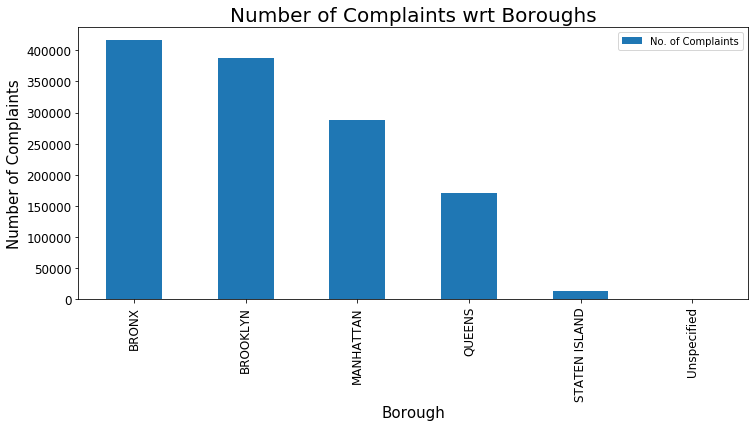

In [8]:
#Visualization of Complaint Type wrt Borough.
ax = borough_complaint.plot(kind = 'bar', figsize = (12,5), fontsize = 12)              
ax.set_xlabel('Borough', fontsize = 15)
ax.set_ylabel('Number of Complaints', fontsize = 15)
ax.set_title('Number of Complaints wrt Boroughs', fontsize = 20)

Text(0.5, 1.0, 'Number of Complaints wrt Zipcode')

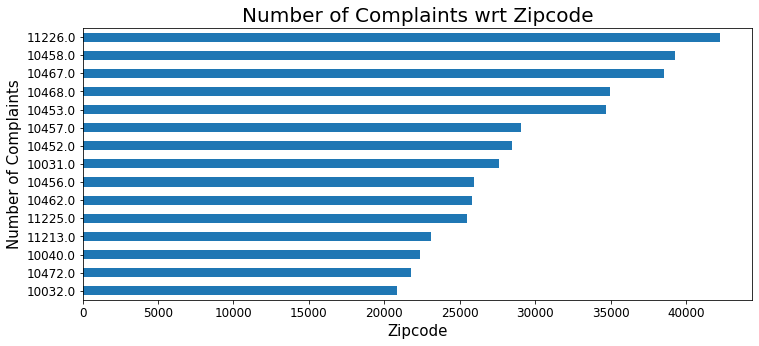

In [9]:
#Visualization of Complaint Type wrt Zipcode.
ax = zip_complaint15.plot(kind = 'barh', figsize = (12,5), fontsize = 12)              
plt.gca().invert_yaxis()
ax.set_xlabel('Zipcode', fontsize = 15)
ax.set_ylabel('Number of Complaints', fontsize = 15)
ax.set_title('Number of Complaints wrt Zipcode', fontsize = 20)

Text(0.5, 1.0, 'Number of Complaints wrt Street')

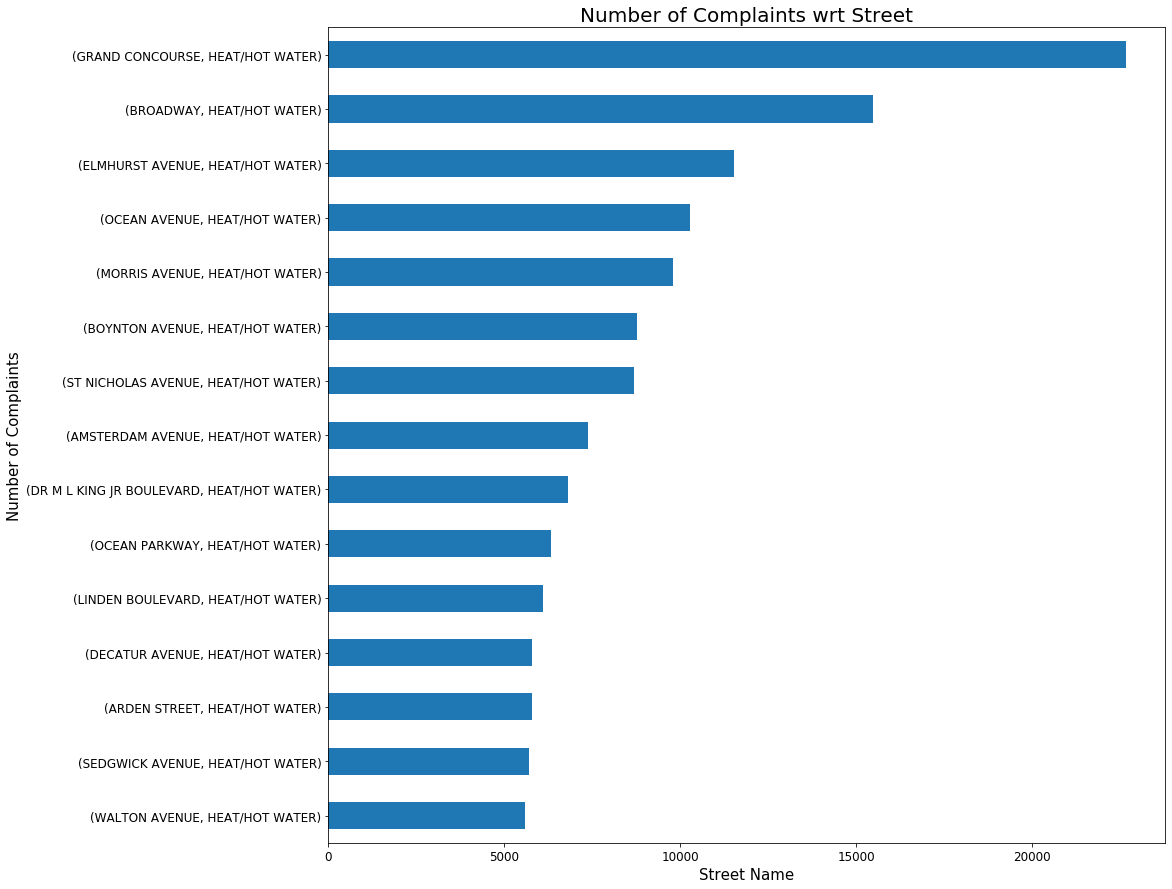

In [10]:
#Visualization of Complaint Type wrt Street.
ax = street_name_complaint15.plot(kind = 'barh', figsize = (15,15), fontsize = 12)              
plt.gca().invert_yaxis()
ax.set_xlabel('Street Name', fontsize = 15)
ax.set_ylabel('Number of Complaints', fontsize = 15)
ax.set_title('Number of Complaints wrt Street', fontsize = 20)

(-74.250706822302, -73.70078552010663, 40.49943972936812, 40.912217580903324)

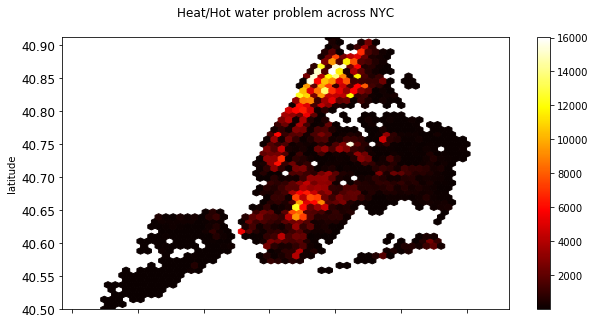

In [11]:
severe_complaint.plot(kind='hexbin', x='longitude', y='latitude', gridsize=50,
    colormap = 'hot',mincnt=1,title = 'Heat/Hot water problem across NYC\n', 
                    fontsize = 12,figsize=(10,5)).axis('equal')

The above map also shows the severity of complaints comes from Bronx since the longitude and latitude of Bronx is 40.6782° N, 73.9442° W.

##### Conclusion for Question 2: 

**The borough category 'BRONX' has the highest number of 'HEAT/HOT Water' complaints. '11226' is the zipcode that has the highest complaint come from. 'Grand Concourse' is also the street where the complaints are the highest.**